In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [3]:
df_cat = pd.read_csv(f'{combine_fold}/dor-restaging.csv', index_col = 0)[['Stage', 'prim_id', 'sec_id']]

In [4]:
df_cat

,Stage,prim_id,sec_id
4000705532455,stage4,816891.0,NaN
4000705533383,stage3,860686.0,NaN
4000705539941,stage2,1301188.0,NaN
4000705540034,stage3,1304538.0,NaN
4000705540064,stage3,1310001.0,1311422.0
...,...,...,...
4001111524196,stage2,991056.0,988878.0
4001185627710,stage2,1294479.0,1295082.0
6000508613553,stage2,1140076.0,NaN
6000518662663,stage2,575198.0,588501.0


### Plotting Stage w/ Visual Classification
Here, we're conducting a basic diagnostic. I want to see the spread in my visual classification against the stages.

In [5]:
df_prim_sec = (
    df_cat
    .assign(sec_identified = df_cat.sec_id.apply(lambda x: 'y' if not np.isnan(x) else 'n'))
)

In [6]:
values = df_prim_sec.sec_identified.value_counts()

In [7]:
values

n    2209
y     834
Name: sec_identified, dtype: int64

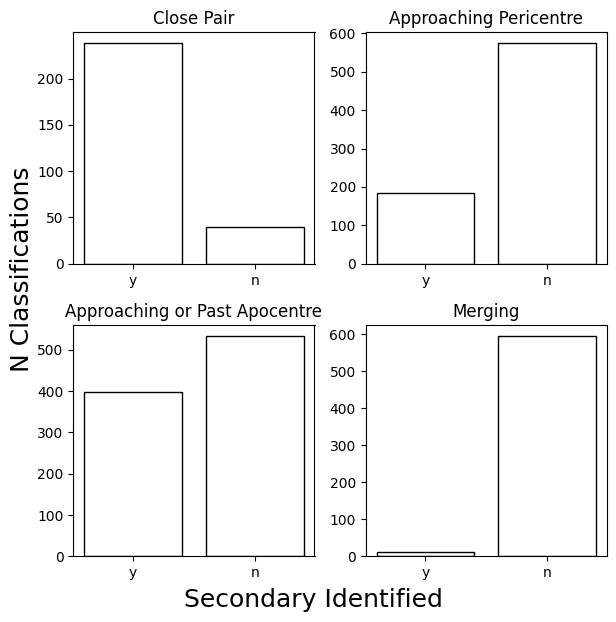

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (6,6))
stages = ['Close Pair', 'Approaching Pericentre', 'Approaching or Past Apocentre', 'Merging']

counter = 1
for i in range(2):
    for j in range(2):
        df = df_prim_sec.query(f'Stage == "stage{counter}"')
        values = df.sec_identified.value_counts()
        ax[i,j].bar(
            range(len(values)),
            [values['y'], values['n']],
            tick_label = ['y','n'],
            fill=False,
        )
        ax[i,j].set_title(f'{stages[counter-1]}')
        counter += 1
fig.text(0.27, -0.02, 'Secondary Identified', fontsize = 18)
fig.text(-0.02,0.38, 'N Classifications', fontsize = 18, rotation = 'vertical')
fig.tight_layout()
# fig.savefig('C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures/visualisation_classification.pdf', bbox_inches = 'tight')

### Over all

In [48]:
df_merg = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
df_merg.category.value_counts()

stage3    1525
stage2    1043
stage1     858
stage4     755
Name: category, dtype: int64

In [51]:
x = ['Stage 1', 'Stage 2', 'Stage 3','Stage 4']
y = [858, 1043, 1525, 755]

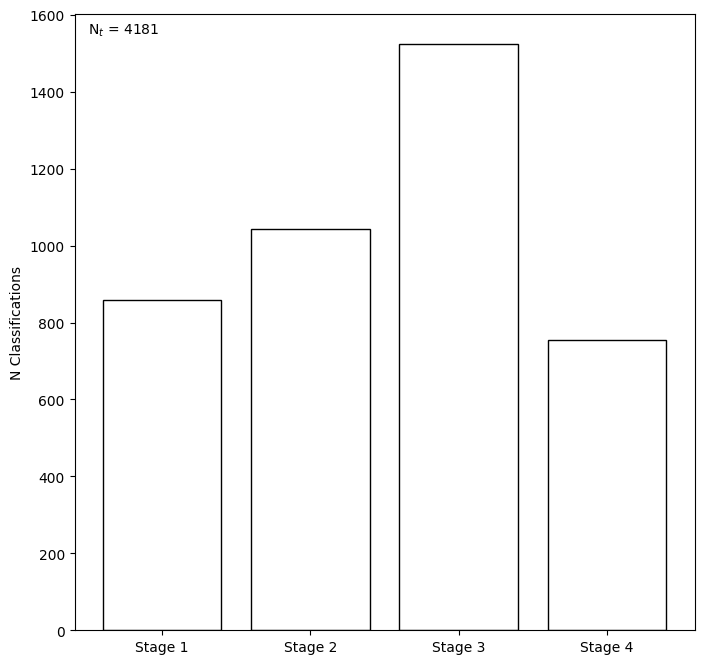

In [62]:
plt.figure(figsize = (8,8))
plt.bar(x, y, fill = False)
plt.ylabel('N Classifications')
plt.text(-0.5, 1550, f'N$_t$ = {df_merg.category.value_counts().sum()}')
plt.savefig(f'{fig_folder}/n-classifications-stages.pdf', bbox_inches = 'tight')
plt.show()